# Поиск оптимальной границы и ошибки классификации для разных моделей ядро-ядерного взаимодействия, для разных радиусов r1, r2 в промежутке между средними значениями для групп первичных частиц (p, N, Fe)

Ввод данных:

In [2]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
import pandas as pd
import csv

f1='fitres_p=15_01-60'
f2='fitres_N=15_01-60'
f3='fitres_Fe=15_01-60'
f4='fitres_He=15_01-60'

f5='fitres_p=15_01-60_q2'
f6='fitres_N=15_01-60_q2'
f7='fitres_Fe=15_01-60_q2'
f8='fitres_He=15_01-60_q2'

rhomax=170
p0max=2000
chi2max=10000

#f0=open('text.txt', 'w')
#for index in p1['p0']:
#  f0.write(str(index) + '\n')

p1=pd.DataFrame()
N1=pd.DataFrame()

p1=pd.read_csv(f1, header=None, sep='  ', engine='python')
p1.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
p1 = p1.drop(p1[(p1.p0 > p0max)|(p1.p0<1)|(p1.chi2>chi2max)|((((p1.p3)*(p1.p3)+(p1.p4)*(p1.p4)))>rhomax*rhomax)].index)
print(len(p1['p1']))
p1.index=np.arange(len(p1['p0']))

N1=pd.read_csv(f2, header=None, sep='  ', engine='python')
N1.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
N1 = N1.drop(N1[(N1.p0 > p0max)|(N1.p0<1)|(N1.chi2>chi2max)|((((N1.p3)*(N1.p3)+(N1.p4)*(N1.p4)))>rhomax*rhomax)].index)
print(len(N1['p1']))
N1.index=np.arange(len(N1['p0']))

Fe1=pd.read_csv(f3,header=None, sep='  ', engine='python')
Fe1.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
Fe1 = Fe1.drop(Fe1[(Fe1.p0 > p0max)|(Fe1.p0<1)|(Fe1.chi2>chi2max)|((((Fe1.p3)*(Fe1.p3)+(Fe1.p4)*(Fe1.p4)))>rhomax*rhomax)].index)
print(len(Fe1['p1']))
Fe1.index=np.arange(len(Fe1['p0']))

He1=pd.read_csv(f4,header=None,sep='  ', engine='python')
He1.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
He1 = He1.drop(He1[(He1.p0 > p0max)|(He1.p0<1)|(He1.chi2>chi2max)|((((He1.p3)*(He1.p3)+(He1.p4)*(He1.p4)))>rhomax*rhomax)].index)
print(len(He1['p1']))
He1.index=np.arange(len(He1['p0']))

p2=pd.read_csv(f5,header=None, sep='  ', engine='python')
p2.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
p2 = p2.drop(p2[(p2.p0 > p0max)|(p2.p0<1)|(p2.chi2>chi2max)|((((p2.p3)*(p2.p3)+(p2.p4)*(p2.p4)))>rhomax*rhomax)].index)
print(len(p2['p1']))
p2.index=np.arange(len(p2['p0']))

N2=pd.read_csv(f6,header=None,sep='  ', engine='python')
N2.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
N2 = N2.drop(N2[(N2.p0 > p0max)|(N2.p0<1)|(N2.chi2>chi2max)|((((N2.p3)*(N2.p3)+(N2.p4)*(N2.p4)))>rhomax*rhomax)].index)
print(len(N2['p1']))
N2.index=np.arange(len(N2['p0']))

Fe2=pd.read_csv(f7,header=None,sep='  ', engine='python')
Fe2.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
Fe2 = Fe2.drop(Fe2[(Fe1.p0 > p0max)|(Fe2.p0<1)|(Fe2.chi2>chi2max)|((((Fe2.p3)*(Fe2.p3)+(Fe2.p4)*(Fe2.p4)))>rhomax*rhomax)].index)
print(len(Fe2['p1']))
Fe2.index=np.arange(len(Fe2['p0']))

He2=pd.read_csv(f8,header=None,sep='  ', engine='python')
He2.columns=['p0','p0e','p1','p1e','p2','p2e','p3','p3e','p4','p4e','ndf','chi2']
He2 = He2.drop(He2[(He2.p0 > p0max)|(He2.p0<1)|(He2.chi2>chi2max)|((((He2.p3)*(He2.p3)+(He2.p4)*(He2.p4)))>rhomax*rhomax)].index)
print(len(He2['p1']))
He2.index=np.arange(len(He2['p0']))

#He2.head()
df=pd.concat([p1, N1,Fe1,He1,p2,N2,Fe2,He2], keys=[0,1,2,3,4,5,6,7])

584
713
674
671
627
691
680
664


cri[0] - p
cri[1] - N
cri[2] - Fe
cri[3] - He

cri[4] - p
cri[5] - N
cri[6] - Fe
cri[7] - He

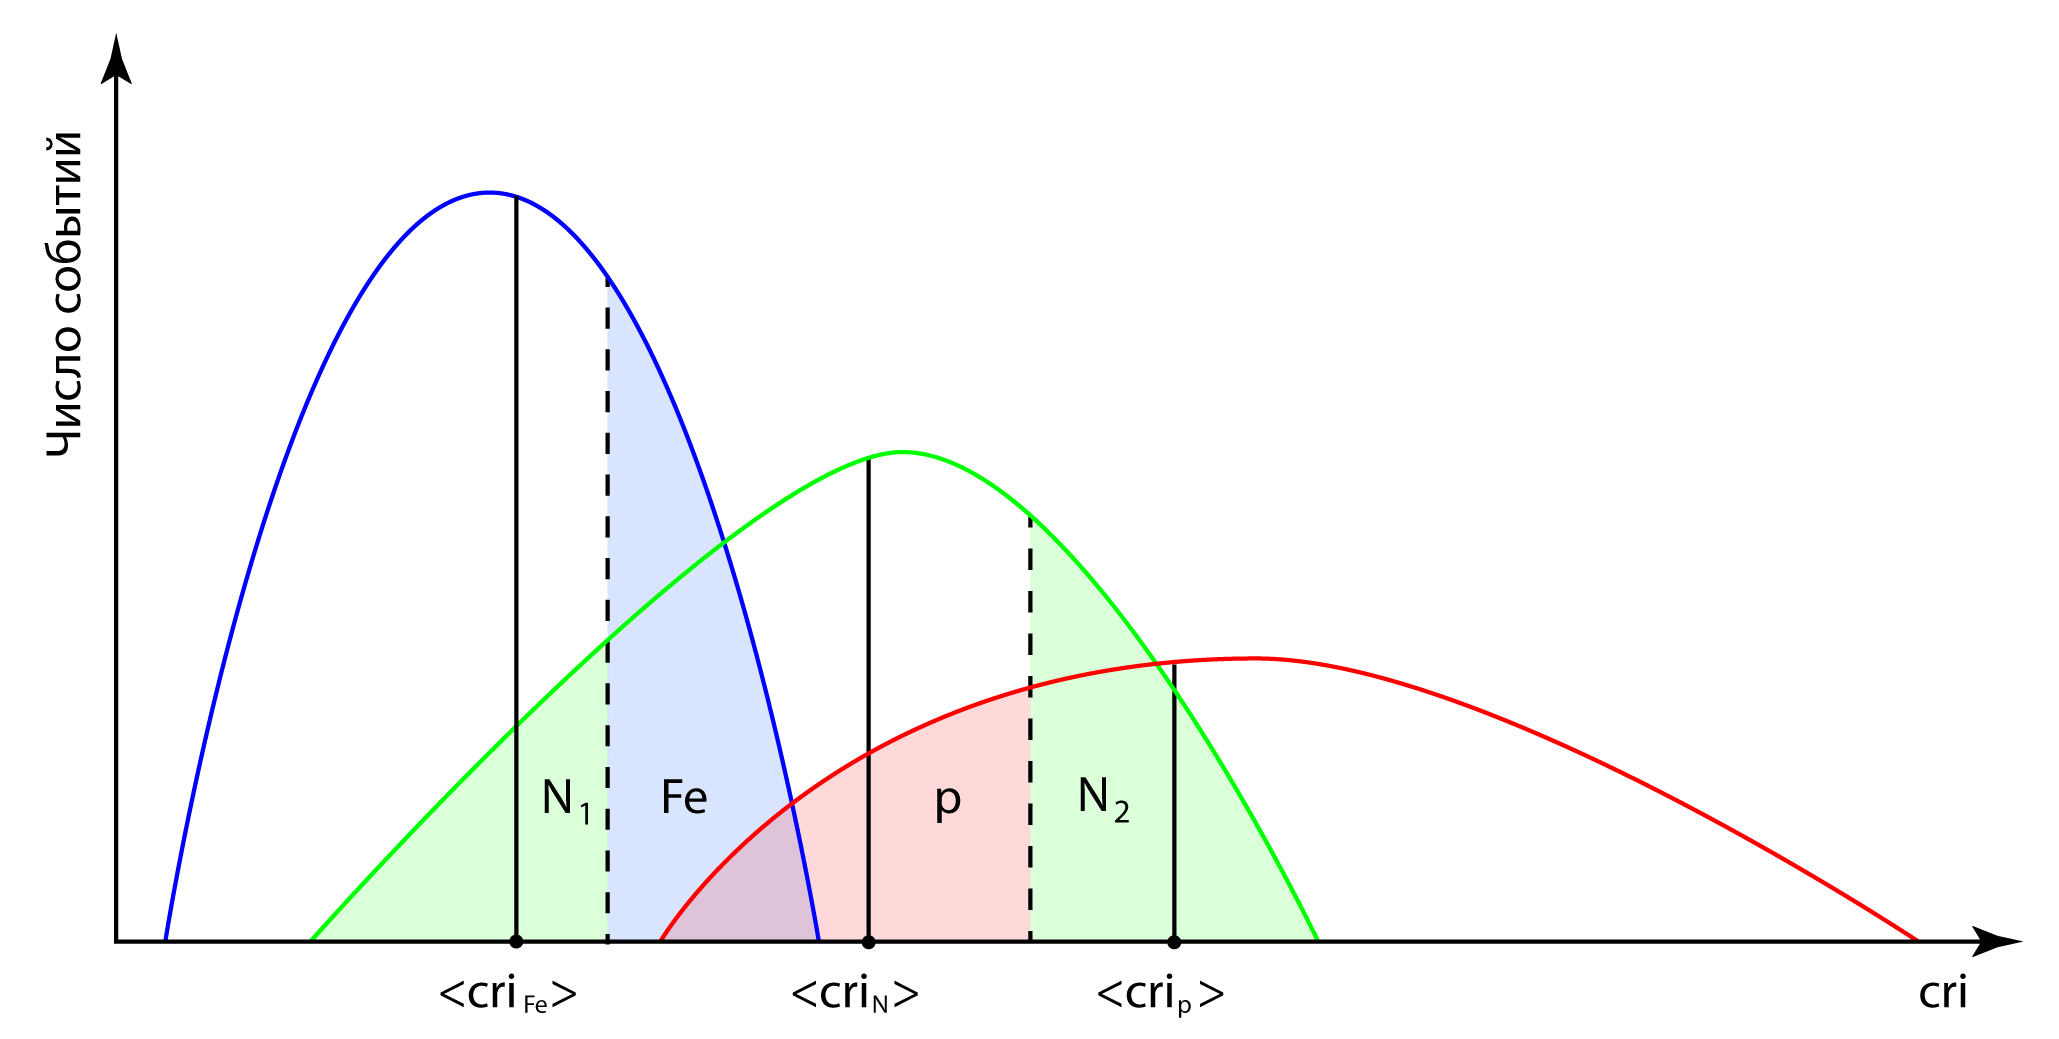

In [3]:
from scipy.integrate import quad
import time
start_time = time.time()

N=100
pn_max_mi,pn_summi,pn_deltami,nf_max_mi,nf_summi,nf_deltami=100000,100000,100000,100000,100000,100000
er_pn_max=[]
er_pn_delta=[]
er_pn_sum=[]
er_nf_max=[]
er_nf_delta=[]
er_nf_sum=[]
cr=[]
pn_mi=[]
nf_mi=[]
r1g=[]
r2g=[]
def integrand(r, a0, a1,a2):
    return 2.0*pi* a0*r / ((1.0 + a1*r + a2*r*r)*(1.0 + 0.0080*r))

for k in range(11):   #60<r1<160
    r1 = 60.0 + 10.0*k
    print(r1)
    for l in range(1,17-k):  #r1+10<r2<220
        r2 = r1 + 10.0*l
        r1g.append(r1)
        r2g.append(r2)
        aver=np.zeros(8)
        s1=0
        s2=0
        cri=[]
        for i in range(8):
            L=len(df['p0'][i])
            cri_j=np.zeros(L)
            for j in range(L):
                a0 = df['p0'][i,j]
                a1 = df['p1'][i,j]
                a2 = df['p2'][i,j]
                s1 = quad(integrand, 0, r1, args=(a0,a1,a2))
                s2 = quad(integrand, r1, r2, args=(a0,a1,a2))
                cri_j[j]=s1[0]/s2[0]
            aver[i]=sum(cri_j)/L                
            cri.append(cri_j)
            
#-------------------------------p-N-----------------------------------------------     

        bpn_min=min(aver[1],aver[5])
        bpn_max=max(aver[0],aver[4])
        Nn=(bpn_max-bpn_min)/N

        for bpn in np.arange(bpn_min,bpn_max,Nn):      
            pn_p=np.count_nonzero(cri[0]<bpn)/float(len(df['p0'][0]))
            pn_n=np.count_nonzero(cri[1]>bpn)/float(len(df['p0'][1]))
            pn_p2=np.count_nonzero(cri[4]<bpn)/float(len(df['p0'][4]))
            pn_n2=np.count_nonzero(cri[5]>bpn)/float(len(df['p0'][5]))
            
            # 1 способ поиска min ошибки. Min(max)
            pn_max=max(pn_p,pn_n,pn_p2,pn_n2)
            if pn_max<pn_max_mi:
                pn_max_mi=pn_max
                pn_border_max=bpn
                pn_r1_max,pn_r2_max=r1,r2
                er_pn_max=[pn_p,pn_n,pn_p2,pn_n2]
                
                
            #2 способ.                 
            delta = abs(pn_p-pn_p2)+abs(pn_n-pn_n2)   
            if delta<pn_deltami:
                pn_deltami = delta
                pn_delta=pn_max
                pn_border_delta=bpn
                pn_r1_delta,pn_r2_delta=r1,r2
                er_pn_delta=[pn_p,pn_n,pn_p2,pn_n2]
           
            #3 способ поиска min. Две максимальные ошибки наиболее близки друг к другу. Это предполо
            #жено из того. Если посмотреть на файл с ошибками для разных границ, то можно заметить что 
            #ошибки в одном случае растут, в другом убывают. Из этого я сделала вывод, что можно не просто 
            #искать  max(min), а наиболее близкие друг к другу две наивысшие ошибки
            if pn_p<=pn_n: pn_p=pn_n
            if pn_p2<=pn_n2: pn_p2=pn_n2
            summ=(pn_p+pn_p2)/2
            summa=abs(pn_p-summ)+abs(pn_p2-summ)            
            if summa<pn_summi:
                pn_summi=summa
                pn_border_sum=bpn
                pn_sum=max(pn_p,pn_p2)
                pn_r1_sum=r1
                pn_r2_sum=r2
                er_pn_sum=[pn_p,pn_n,pn_p2,pn_n2]
            #------------------------------    
        pn_mi.append(pn_max_mi)        
#--------------------------------N-Fe----------------------------------------- 

        bnf_min=min(aver[2],aver[6])
        bnf_max=max(aver[1],aver[5])
        Nf=(bnf_max-bnf_min)/N

        for bnf in np.arange(bnf_min,bnf_max,Nf):      #Сразу считаю ошибки.
            nf_n=np.count_nonzero(cri[1]<bnf)/float(len(df['p0'][1]))
            nf_f=np.count_nonzero(cri[2]>bnf)/float(len(df['p0'][2]))
            nf_n2=np.count_nonzero(cri[5]<bnf)/float(len(df['p0'][5]))
            nf_f2=np.count_nonzero(cri[6]>bnf)/float(len(df['p0'][6]))
            
            # 1 способ поиска min ошибки. Min(max)
            nf_max=max(nf_n,nf_f,nf_n2,nf_f2)
            if nf_max<nf_max_mi:
                nf_max_mi=nf_max
                nf_border_max=bnf
                nf_r1_max,nf_r2_max=r1,r2
                er_nf_max=[nf_n,nf_f,nf_n2,nf_f2]
            
            #2 способ.                 
            delta = abs(nf_n-nf_n2)+abs(nf_f-nf_f2)   
            if delta<nf_deltami:
                nf_deltami = delta
                nf_delta=nf_max
                nf_border_delta=bnf
                nf_r1_delta=r1
                nf_r2_delta=r2
                er_nf_delta=[nf_n,nf_f,nf_n2,nf_f2]
                
            #3 способ
            if nf_n<=nf_f: nf_n=nf_f
            if nf_n2<=nf_f2: nf_n2=nf_f2
            summ=(nf_n+nf_n2)/2
            summa=abs(nf_n-summ)+abs(nf_n2-summ)            
            if summa<nf_summi:
                nf_summi=summa
                nf_border_sum=bnf
                nf_sum=max(nf_n,nf_n2)
                nf_r1_sum,nf_r2_sum=r1,r2
                er_nf_sum=[nf_n,nf_f,nf_n2,nf_f2]
            #-----------------------------
        nf_mi.append(nf_max_mi)  
        #---------------------------------
r1_g = np.array(r1g)
r2_g = np.array(r2g)
pn_mi_g = np.array(pn_mi)        
nf_mi_g = np.array(nf_mi)   

print(pn_max_mi,pn_border_max,pn_r1_max,pn_r2_max)
print(pn_delta,pn_border_delta,pn_r1_delta,pn_r2_delta)
print(pn_sum,pn_border_sum,pn_r1_sum,pn_r2_sum)

print(nf_max_mi,nf_border_max,nf_r1_max,nf_r2_max)
print(nf_delta,nf_border_delta,nf_r1_delta,nf_r2_delta)
print(nf_sum,nf_border_sum,nf_r1_sum,nf_r2_sum)

print("--- %s seconds ---" % (time.time() - start_time))

60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
0.4058219178082192 4.103305782249329 150.0 190.0
0.4914383561643836 0.7784421902019615 90.0 200.0
0.4486301369863014 0.4636782689737685 60.0 150.0
0.37727910238429174 3.4419085060014036 160.0 210.0
0.726507713884993 1.7395063330118432 120.0 190.0
0.3870967741935484 3.3892036852732996 140.0 180.0
--- 120.91451930999756 seconds ---


### Для поиска оптимальной границы 

Для радиусов 60<r1<160, r1+10<r2<220 рассматриваются границы между средними значениями критерия для каждой группы(p, N, Fe). 

При этом, так как используются две модели, нижней границей pn является min(aver_N,aver_N2), верхней границей является соответственно  max(aver_p,aver_p2).

Далее высчитываю оптимальную границу и оптимальные ошибки тремя способами.

1)  Способ поиска минимальной максимальной ошибки min(max). Этот способ покажет действительно наименьшую ошибку. Первая строка с ошибками отображает этот метод. Видно, что для p-N границы ошибка не превышает 0.39 при r1=160, r2=220.

2) Способ минимизации разницы между ошибками одной группы разных взаимодействий очень коррелирует с первым способом, хотя оптимальная ошибка получается не такой хорошей. Поэтому есть смысл использовать именно первый способ.

3) Третий способ заключается в поиске двух максимальных ошибок (из четырех) наиболее близких друг к другу. Если посмотреть на файл с ошибками для разных границ, то можно заметить что ошибки в одном случае растут, в другом убывают. Тогда найдя наиболее близкие друг к другу две наивысшие ошибки (из четырех) найдутся как раз минимальные ошибки, причем они будут примерно равны. Но более эффектиным все же будет метод минимизации максимальной ошибки. Этот способ учитывает сразу два фактора - минимизацию и близость ошибок классификации. 
 
Далее предствалены таблицы с оптимальными критериями, с использованием трех методов.

In [7]:
table=pd.DataFrame
print("\n \033[1m" + 'p-N border')
table=[['min(max)',pn_max_mi,pn_border_max,pn_r1_max,pn_r2_max],
       ['delta',pn_delta,pn_border_delta,pn_r1_delta,pn_r2_delta],
       ['summ',pn_sum,pn_border_sum,pn_r1_sum,pn_r2_sum]]
pd.DataFrame(table, columns=[' ',"__p-N__","border N-Fe", "__r1__",'__r2__'])



 p-N border


,,__p-N__,border N-Fe,__r1__,__r2__
0,min(max),0.405822,4.103306,150.0,190.0
1,delta,0.491438,0.778442,90.0,200.0
2,summ,0.448630,0.463678,60.0,150.0


In [8]:
print("\n \033[1m" + 'N-Fe border')
table=pd.DataFrame
table=[['min(max)',nf_max_mi,nf_border_max,nf_r1_max,nf_r2_max],
       ['delta',nf_delta,nf_border_delta,nf_r1_delta,nf_r2_delta],
       ['summ',nf_sum,nf_border_sum,nf_r1_sum,nf_r2_sum]]
pd.DataFrame(table, columns=[' ',"__N-Fe__","border N-Fe", "__r1__",'__r2__'])


 N-Fe border


,,__N-Fe__,border N-Fe,__r1__,__r2__
0,min(max),0.377279,3.441909,160.0,210.0
1,delta,0.726508,1.739506,120.0,190.0
2,summ,0.387097,3.389204,140.0,180.0


### В вышеприведенных таблицах видно, что для p-N и для N-Fe различаются лучшие значения радиусов r1,r2.

Поэтому следует найти общие радиусы. Для этого складываются два массива данных, содержащих ошибки при разных радиусах для двух границ p-N и N-Fe. Эти два массива наглядно показаны на рисунках ниже, а также их сумма. Из получившегося набора данных ищется минимамльное значение. Оно и будет соответсвовать оптимальным радиусам.  

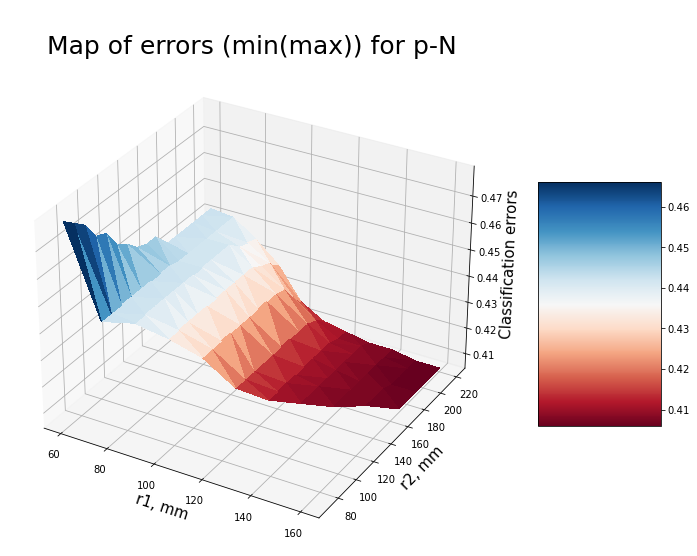

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,9))

surf = ax.plot_trisurf(r1_g, r2_g, pn_mi_g, cmap=cm.RdBu,
                       linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('r1, mm', fontsize=15)
ax.set_ylabel('r2, mm', fontsize=15)
ax.set_zlabel('Classification errors', fontsize=15)
ax.set_title('\n Map of errors (min(max)) for p-N ',fontsize=25)
fig.colorbar(surf, shrink=0.5, aspect=2)

plt.show()

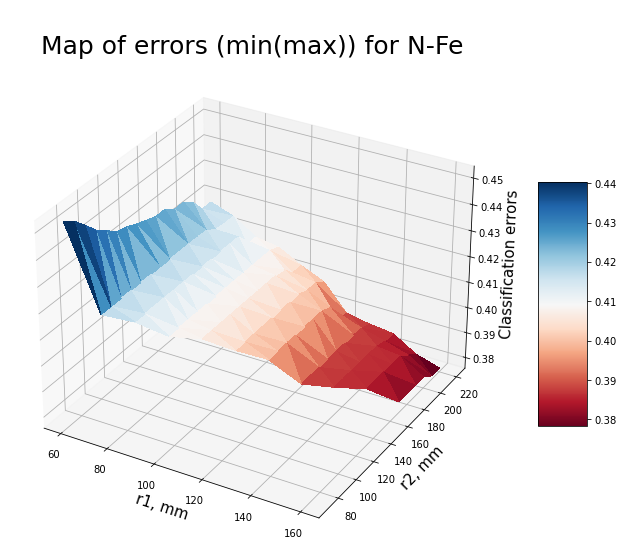

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,9))

surf = ax.plot_trisurf(r1_g, r2_g, nf_mi_g, cmap=cm.RdBu,
                       linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('r1, mm', fontsize=15)
ax.set_ylabel('r2, mm', fontsize=15)
ax.set_zlabel('Classification errors', fontsize=15)
ax.set_title('\n Map of errors (min(max)) for N-Fe ',fontsize=25)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### На графиках, представленных выше прослеживается монотонность уменьшения ошибок классификации при увеличении r1, r2

In [11]:
err=(pn_mi_g+nf_mi_g)/2
err_mi=np.argmin(err)
r1_mi=r1_g[err_mi]
r2_mi=r2_g[err_mi]
print(err_mi,err[err_mi],r1_mi,r2_mi)

119 0.39155051009625547 160.0 210.0


### Посчитав ошибки для p-N и для N-Fe отдельно, сложили их вместе, чтобы посмотреть при каких радиусах будет наименьшая совместная ошибка. Итак, критерием с минимальной ошибкой будет критерий 

## при r1=160, r2=210 мм 

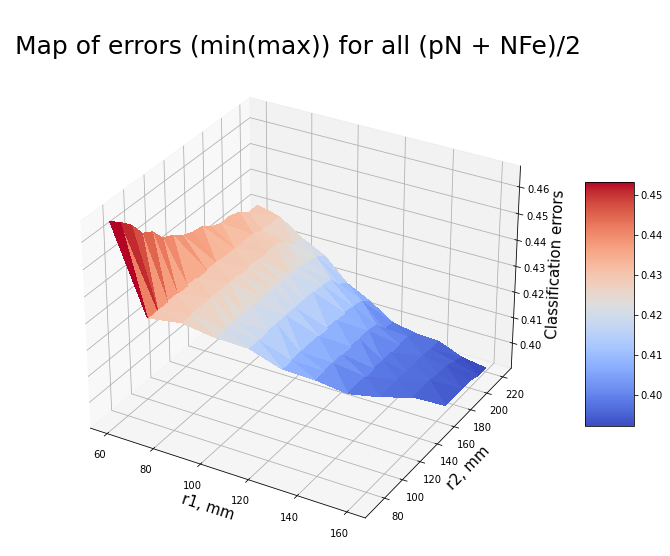

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,9))

surf = ax.plot_trisurf(r1_g, r2_g, err, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('r1, mm', fontsize=15)
ax.set_ylabel('r2, mm', fontsize=15)
ax.set_zlabel('Classification errors', fontsize=15)
ax.set_title('\n Map of errors (min(max)) for all (pN + NFe)/2 ',fontsize=25)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Считаю критерий для оптимальных радиусов r1=160, r2=210 мм

In [35]:
s1=0
s2=0
pn_max_mi,pn_summi,pn_deltami,nf_max_mi,nf_summi,nf_deltami=100000,100000,100000,100000,100000,100000
r1=r1_mi
r2=r2_mi+10
cri=[]
for i in range(8):
    L=len(df['p0'][i])
    cri_j=np.zeros(L)
    for j in range(L):
        a0 = df['p0'][i,j]
        a1 = df['p1'][i,j]
        a2 = df['p2'][i,j]
        s1 = quad(integrand, 0, r1, args=(a0,a1,a2))
        s2 = quad(integrand, r1, r2, args=(a0,a1,a2))
        cri_j[j]=s1[0]/s2[0]
    aver[i]=sum(cri_j)/L                
    cri.append(cri_j)
bpn_min=min(aver[1],aver[5])
bpn_max=max(aver[0],aver[4])
Nn=(bpn_max-bpn_min)/N

for bpn in np.arange(bpn_min,bpn_max,Nn):      
    pn_p=np.count_nonzero(cri[0]<bpn)/float(len(df['p0'][0]))
    pn_n=np.count_nonzero(cri[1]>bpn)/float(len(df['p0'][1]))
    pn_p2=np.count_nonzero(cri[4]<bpn)/float(len(df['p0'][4]))
    pn_n2=np.count_nonzero(cri[5]>bpn)/float(len(df['p0'][5]))
            
            # 1 способ поиска min ошибки. Min(max)
    pn_max=max(pn_p,pn_n,pn_p2,pn_n2)
    if pn_max<pn_max_mi:
        pn_max_mi=pn_max
        pn_border_max=bpn
        pn_r1_max,pn_r2_max=r1,r2

#--------------------------------N-Fe----------------------------------------- 

bnf_min=min(aver[2],aver[6])
bnf_max=max(aver[1],aver[5])
Nf=(bnf_max-bnf_min)/N

for bnf in np.arange(bnf_min,bnf_max,Nf):      #Сразу считаю ошибки.
    nf_n=np.count_nonzero(cri[1]<bnf)/float(len(df['p0'][1]))
    nf_f=np.count_nonzero(cri[2]>bnf)/float(len(df['p0'][2]))
    nf_n2=np.count_nonzero(cri[5]<bnf)/float(len(df['p0'][5]))
    nf_f2=np.count_nonzero(cri[6]>bnf)/float(len(df['p0'][6]))
            
        # 1 способ поиска min ошибки. Min(max)
    nf_max=max(nf_n,nf_f,nf_n2,nf_f2)
    if nf_max<nf_max_mi:
        nf_max_mi=nf_max
        nf_border_max=bnf
        nf_r1_max,nf_r2_max=r1,r2
         

# p-N border

In [36]:
table=pd.DataFrame
print("\n \033[1m" + 'p-N border')
table=[['min(max)',pn_max_mi,pn_border_max,pn_r1_max,pn_r2_max]]
pd.DataFrame(table, columns=[' ',"__p-N__","border N-Fe", "__r1__",'__r2__'])



 p-N border


,,__p-N__,border N-Fe,__r1__,__r2__
0,min(max),0.409247,3.179817,160.0,220.0


In [37]:
err=pd.DataFrame
err=[er_pn_max]

pd.DataFrame(err,columns=['pn_p','pn_n','pn_p2','pn_n2'])

,pn_p,pn_n,pn_p2,pn_n2
0,0.405822,0.2777,0.301435,0.40521


# N-Fe border

In [38]:
print("\n \033[1m" + 'N-Fe border')
table=pd.DataFrame
table=[['min(max)',nf_max_mi,nf_border_max,nf_r1_max,nf_r2_max]]
pd.DataFrame(table, columns=[' ',"__N-Fe__","border N-Fe", "__r1__",'__r2__'])


 N-Fe border


,,__N-Fe__,border N-Fe,__r1__,__r2__
0,min(max),0.377279,2.925779,160.0,220.0


In [39]:
err=pd.DataFrame
err=[er_nf_max]

pd.DataFrame(err,columns=['nf_n','nf_f','nf_n2','nf_f2'])

,nf_n,nf_f,nf_n2,nf_f2
0,0.377279,0.222552,0.195369,0.373529


В таблицах выше приведены значения для r1=160,r2=220. Ниже записаны границы и ошибки для r2=210

При r1=160, r2=210 лучшими границами по первому методу (минимизации максимума) будет 

### border p-N =  3.73        при err_pN = 0.41

### border N-Fe =  3.44      при err_NFe = 0.38


# Graphics


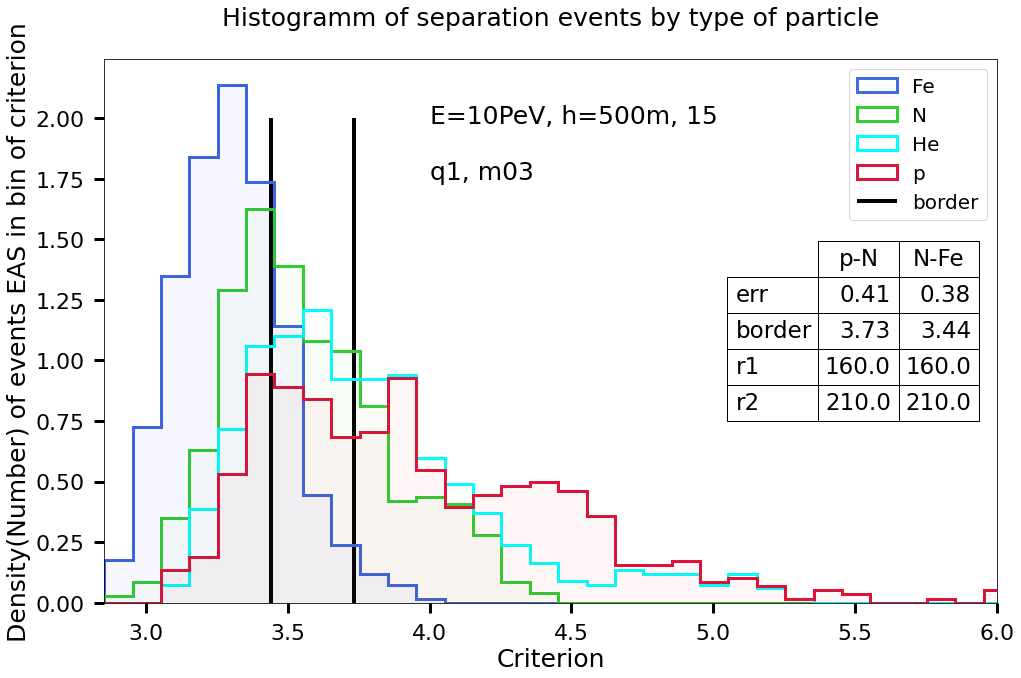

In [31]:
fig, axs = plt.subplots(figsize=(16, 10))

n_bins=20
m=0
mi=min(min(cri[m]),min(cri[m+1]),min(cri[m+2]),min(cri[m+3]))
ma=max(max(cri[m]),max(cri[m+1]),max(cri[m+2]),max(cri[m+3]))
bins = np.arange(mi,ma,0.1)
scale=25

axs.hist(cri[2],bins,histtype="step", density=True,color='royalblue',linewidth=3,label='Fe')
axs.hist(cri[1],bins,histtype="step",density=True, color='limegreen',linewidth=3,label='N')
axs.hist(cri[3],bins,histtype="step",density=True,color='cyan',linewidth=3,label='He')
axs.hist(cri[0],bins,histtype="step", density=True,color='crimson',linewidth=3,label='p')

axs.hist(cri[2],bins,histtype="step",density=True, color='blue',linewidth=3,fill=True, alpha=0.03)
axs.hist(cri[1],bins,histtype="step",density=True, color='limegreen',linewidth=3,fill=True, alpha=0.03)
axs.hist(cri[0],bins,histtype="step",density=True, color='red',linewidth=3,fill=True, alpha=0.03)

axs.vlines(pn_border_max,0,2,linewidth=4,color='black',label='border')
axs.vlines(nf_border_max,0,2,linewidth=4,color='black')

axs.set_xlim(mi,6)
axs.tick_params(which = 'major',    #  Применяем параметры к основным делениям
               length = 10,    #  Длинна делений
               width = 3,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 22,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               )    #  Поворот подписей
axs.set_xlabel('Criterion',fontsize=scale)
axs.set_ylabel('Density(Number) of events EAS in bin of criterion',fontsize=scale)
axs.set_title('Histogramm of separation events by type of particle\n',fontsize=scale)

col_labels=['p-N','N-Fe'] 
row_labels=['err','border','r1','r2'] 
table_vals=[[round(pn_max_mi,2),round(nf_max_mi,2)],[round(pn_border_max,2),round(nf_border_max,2)],[pn_r1_max,pn_r1_max],[pn_r2_max,nf_r2_max]] 
the_table = plt.table(cellText=table_vals, colWidths = [0.03] * 2, 
                      rowLabels=row_labels, colLabels=col_labels, loc='center right',fontsize=20) 

the_table.set_fontsize(scale)
the_table.scale(3, 3)

axs.text(4,1.75,'E=10PeV, h=500m, 15\n\nq1, m03',fontsize=scale)

plt.legend(fontsize=20)
plt.show()

На графике представлена таблица с оптимальными границами и соответсвующими ошибками для двух моделей ядро-ядерного взаимодействия. Сейчас нарисована плотность, так как график ниже только в виде плотности могу сделать. Убрав density получу кол-во событий в бине, как написано на ординате

/home/vasilisa/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vasilisa/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vasilisa/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

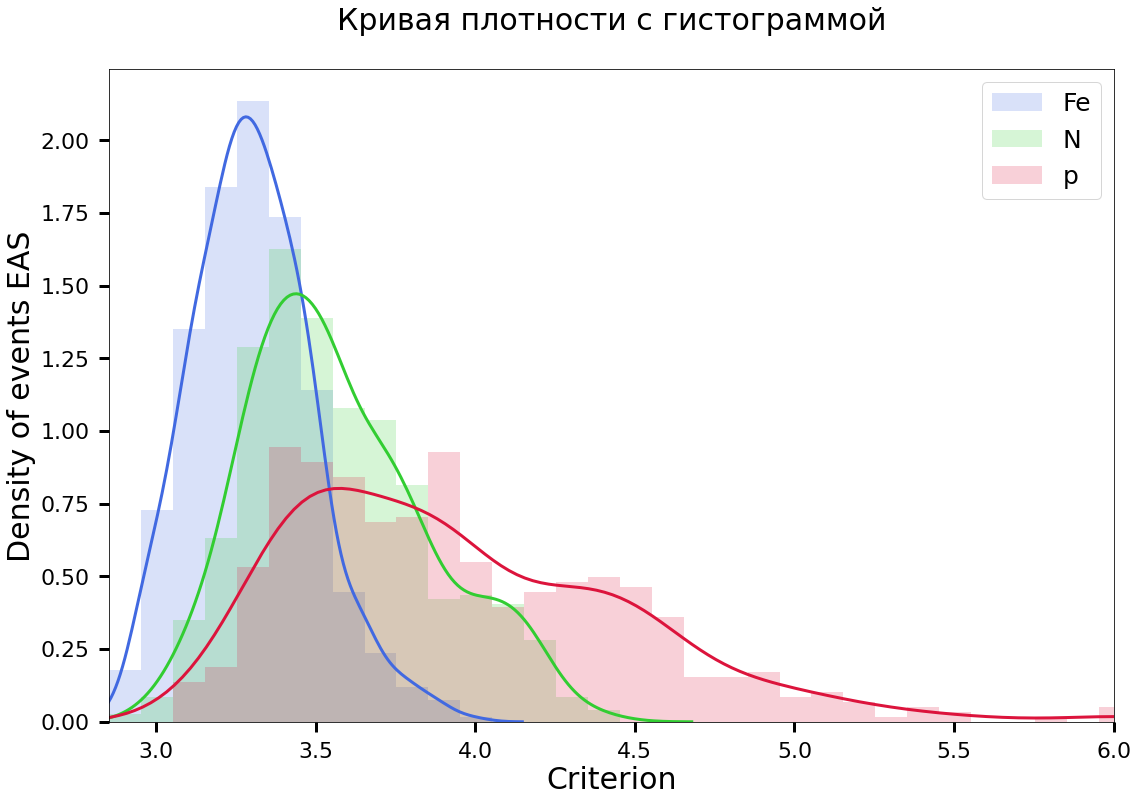

In [33]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 12))

n_bins=20
m=0
mi=min(min(cri[m]),min(cri[m+1]),min(cri[m+2]),min(cri[m+3]))
ma=max(max(cri[m]),max(cri[m+1]),max(cri[m+2]),max(cri[m+3]))
bins = np.arange(mi,ma,0.1)

axs.tick_params(which = 'major',    #  Применяем параметры к основным делениям
               length = 10,    #  Длинна делений
               width = 3,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 22,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               )    #  Поворот подписей
axs.set_xlabel('Criterion',fontsize=30)
axs.set_ylabel('Density of events EAS',fontsize=30)
axs.set_title('Кривая плотности с гистограммой\n',fontsize=30)

sns.distplot(cri[2], bins,color="royalblue", label="Fe", hist_kws={'alpha':.2}, kde_kws={'linewidth':3})
sns.distplot(cri[1], bins,color="limegreen", label="N", hist_kws={'alpha':.2}, kde_kws={'linewidth':3})
sns.distplot(cri[0], bins,color="crimson", label="p", hist_kws={'alpha':.2}, kde_kws={'linewidth':3})
#axs.vlines(pn_border_max,0,2,linewidth=4,color='black',label='border')
#axs.vlines(nf_border_max,0,2,linewidth=4,color='black')

axs.set_xlim(mi,6)

plt.legend(fontsize=25)
plt.show()


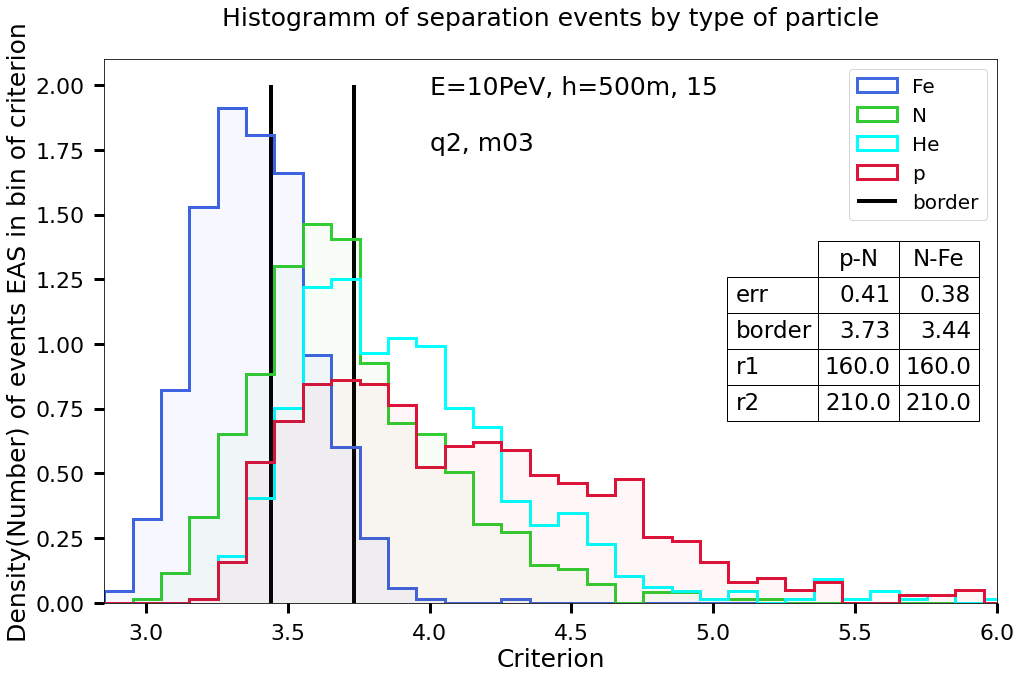

In [34]:
fig, axs = plt.subplots(figsize=(16, 10))

n_bins=20
m=0
mi=min(min(cri[m]),min(cri[m+1]),min(cri[m+2]),min(cri[m+3]))
ma=max(max(cri[m]),max(cri[m+1]),max(cri[m+2]),max(cri[m+3]))
bins = np.arange(mi,ma,0.1)
scale=25

axs.hist(cri[6],bins,histtype="step", density=True,color='royalblue',linewidth=3,label='Fe')
axs.hist(cri[5],bins,histtype="step",density=True, color='limegreen',linewidth=3,label='N')
axs.hist(cri[7],bins,histtype="step",density=True,color='cyan',linewidth=3,label='He')
axs.hist(cri[4],bins,histtype="step", density=True,color='crimson',linewidth=3,label='p')

axs.hist(cri[6],bins,histtype="step",density=True, color='blue',linewidth=3,fill=True, alpha=0.03)
axs.hist(cri[5],bins,histtype="step",density=True, color='limegreen',linewidth=3,fill=True, alpha=0.03)
axs.hist(cri[4],bins,histtype="step",density=True, color='red',linewidth=3,fill=True, alpha=0.03)

axs.vlines(pn_border_max,0,2,linewidth=4,color='black',label='border')
axs.vlines(nf_border_max,0,2,linewidth=4,color='black')

axs.set_xlim(mi,6)
axs.tick_params(which = 'major',    #  Применяем параметры к основным делениям
               length = 10,    #  Длинна делений
               width = 3,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 22,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               )    #  Поворот подписей
axs.set_xlabel('Criterion',fontsize=scale)
axs.set_ylabel('Density(Number) of events EAS in bin of criterion',fontsize=scale)
axs.set_title('Histogramm of separation events by type of particle\n',fontsize=scale)

col_labels=['p-N','N-Fe'] 
row_labels=['err','border','r1','r2'] 
table_vals=[[round(pn_max_mi,2),round(nf_max_mi,2)],[round(pn_border_max,2),round(nf_border_max,2)],[pn_r1_max,pn_r1_max],[pn_r2_max,nf_r2_max]] 
the_table = plt.table(cellText=table_vals, colWidths = [0.03] * 2, 
                      rowLabels=row_labels, colLabels=col_labels, loc='center right',fontsize=20) 

the_table.set_fontsize(scale)
the_table.scale(3, 3)

axs.text(4,1.75,'E=10PeV, h=500m, 15\n\nq2, m03',fontsize=scale)

plt.legend(fontsize=20)
plt.show()
